# Što je Colab?

Colab vam omogućava pisanje i pokretanje Python koda u pregledniku bez potrebe za instalacijom ičega. Također vam omogućava dijeljenje koda i besplatno korištenje GPU-a.

Colab je nalik na Python Notebook te vam omogućava pisanje Python koda i Markdown odjeljaka s tekstom, slikama i ostalim.

Ćelije se pokreću pomoću kombinacije **"Ctrl/Shift + Enter"**.

In [1]:
f = 4
print(f)

4


Varijable, klase, funkcije itd. definirane i pokrenute u nekoj čeliji se mogu koristiti u drugim čelijama.

In [2]:
g = f ** 2
print(g)

16


# PyTorch

PyTorch je korisna biblioteka za rad s neuronskim mrežama. Rad u PyTorchu osnovan je na radu s tenzorima koji su struktura nalik na polja i matrice. Biblioteka se uključuje pomoću naredbe `import torch`.

## Tenzori

Tenzori se ponašaju nalik na `numpy` polja i često su funkcije identične onima koje se koriste na poljima. Bitna razlika je što se tenzori mogu koristiti na grafičkim karticama što znatno ubrzava mnoge matematičke operacije. Više o radu na GPU će biti prikazano u nastavku ovog LV-a.

In [44]:
import torch
import numpy as np
from tqdm import tqdm

### Kreiranje tenzora na razne načine

In [4]:
data = [[2, 4], [4, 6]]

# From a list
x_data = torch.tensor(data)
print('x_data\n', x_data)

# From a numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print('x_np\n', x_np)

x_data
 tensor([[2, 4],
        [4, 6]])
x_np
 tensor([[2, 4],
        [4, 6]])


In [5]:
# You can also go back from a tensor to a numpy array
np_arr = x_np.numpy()
print('np_arr\n', np_arr)

np_arr
 [[2 4]
 [4 6]]


In [6]:
# From another tensor
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5634, 0.2007],
        [0.1591, 0.8318]]) 



In [7]:
# With random or constant values
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8211, 0.5145, 0.0042],
        [0.3183, 0.0529, 0.9328]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Rad s tenzorima

In [8]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [9]:
# Indexing and slicing like in numpy

tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Pogledajte razne druge operacije s tenzorima na https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html.

# *Backpropagation* algoritam

U kontekstu neuronskih mreža, funkcija gubitka (*loss function*) je matematička funkcija koja mjeri razliku između stvarnih vrijednosti (*ground truth*) i predviđenih vrijednosti koje generira neuronska mreža. Ova funkcija igra ključnu ulogu u postupku učenja neuronske mreže jer omogućuje procjenu toga koliko dobro neuronska mreža obavlja svoj zadatak.

Cilj učenja je upravo minimmizirati ovu funkciju.

Minimizacija ove funkcije je optimizacijski postupak gdje se najčešće koristi gradijentna metoda. Pri tome se parametri neuronske mreže (težine) prilagođavaju korištenjem gradijenta funkcije gubitka u odnosu na težine.

Učinkovito računanje gradijenata u neuronskim mrežama postiže se backpropagation algoritmom. Algoritam izračunava gradijente funkcije gubitka u odnosu na težine mreže koristeći pravilo lanca derivacije (ulančanih derivacija).

PyTorch nam omogućava automatsko dobivanje derivacija/gradijenata funkcija koje definiramo. Također možemo odrediti koji tenzori zahtjevaju gradijent, koji ne. Prema zadanim postavkama, tenzori ne zahtjevaju gradijent pri stvaranju.

In [10]:
x = torch.ones((3,))
print(x.requires_grad)

False


Ovo možemo promijeniti pozivom funkcije `requires_grad_()` ili zadavanjem argumenta `requires_grad=True` pri inicijalizaciji tenzora.

In [11]:
x.requires_grad_(True)
print(x.requires_grad)

True


Kako bismo se upoznali s gradijentima, uzmimo sljedeću funkciju za primjer:

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 4\right]$$

Zamislimo da su u $x$ naši parametri (ono što bi bile težine u neuronskoj mreži), a želimo optimizirati (maksimizirati ili minimizirati) izlaz $y$. Za ovo su nam potrebni gradijenti $\partial y / \partial \mathbf{x}$. U neuronskim mrežama bismo imali težine $W$ koje bismo trebali naučiti kako bismo optimizirali nekakvu funkciju troška, koja bi naravno ovisila o izlazu iz mreže.

Za ovaj primjer, uzmimo $\mathbf{x}=[0,2,4]$ kao ulaz (parametre).

In [12]:
x = torch.tensor([0, 2, 4], dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 2., 4.], requires_grad=True)


Izradimo graf za izračun izlaza ove funkcije. Ne moramo imati jednu operaciju po liniji, ali za lakše razumijevanje su operacije ovako razdvojene.


In [13]:
a = x + 2
b = a ** 2
c = b + 4
y = c.mean()
print("Y", y)

Y tensor(22.6667, grad_fn=<MeanBackward0>)


Gornji graf možemo vizualizirati:

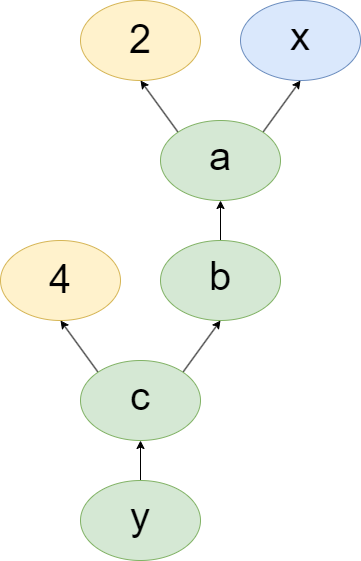

Strelice na shemi prikazuju ovisnost. Tako možemo vidjeti da $a$ ovisi o $x$ i konstanti $2$, $b$ ovisi o $a$ itd. Svaki čvor u grafu ima funkciju `grad_fn` za računanje gradijenta s obzirom na ulaz. Ovo se može vidjeti i kad se ispiše tenzor $y$. Pozivom funkcije `backward()` na posljednjem izlazu, vršimo *backpropagaciju* i računamo gradijent za svaki tenzor koji ima svojstvo `requires_grad=True`.

In [14]:
y.backward()

In [15]:
print(x.grad)

tensor([1.3333, 2.6667, 4.0000])


### GPU (grafička kartica)

GPU nam omogućava paralelizaciju velike količine jednostavnijih operacija što uvelike ubrzava rad neuronskih mreža. Iz tog razloga je vrlo bitna mogućnost korištenja GPU u PyTorchu.

Google Colab omogućuje besplatno korištenje GPU u oblaku.

In [16]:
print(f"Is the GPU available? {torch.cuda.is_available()}")

Is the GPU available? True


Ukoliko korištenje GPU nije omogućeno u Google Colabu, potrebno je to učiniti pritiskom na "Change runtipe type" u padajućem izborniku "Runtime". Ondje je potrebno odabrati prikladnu opciju. Važno je napomenuti da će ovo restartirati runtime te će trebati ponovo pokrenuti sve potrebne ćelije, primjerice pomoću CTRL + F8 za pokretanje svih prethodnih ćelija.

Zadano ponašanje je da se tenzori pri stvaranju stavljaju na CPU. Tenzor se može postaviti na GPU pomoću naredbi `.to(...)` i `.cuda()`. U praksi se često definira objekt `device` koji može označavati GPU ako je omogućen ili CPU inače. Na taj način se može pisati isti kod neovisno o tome koristi li se GPU ili CPU.

In [17]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [18]:
x = torch.zeros(2, 4)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], device='cuda:0')


In [45]:
import time
x = torch.randn(4000, 4000)

## TODO
## Compare the runtime of matrix multiplication of x with itself on CPU and GPU
## Note: For better comparison, it might be good to 'burn in' the GPU by
## performing a matrix operation before timing the matrix multiplication
## Note 2: Use torch.cuda.Event() (check the documentation) for timing when
## performing operations on the GPU
## Note 3: Use torch.cuda.synchronize() to wait for everything to finish
## running on the GPU

Neke od operacija na GPU su implementirane na stohastičan način zbog učinkovitosti. Zbog ponovljivosti rezultata, ponekad je potrebno osigurati da su sve operacije deterministične na dolje prikazani način.

In [20]:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### Treniranje mreže

U nastavku je dan primjer treniranja binarne klasifikacije.

#### Podatkovni skup

U paketu `torch.utils.data` se nalaze funkcionalnosti za učitavanje podataka za treniranje i testiranje. Dvije klase iz ovog paketa su nam važne `data.Dataset` i `data.DataLoader`. Dataset klasa nam služi kao sučelje za pristupanje podacima, dok na DataLoader klasa omogućava efikasan rad s podacima u *batchevima*. Slijedi primjer kreiranja vlastitog podatkovnog skupa. Bitne su nam funkcije `__len__`, koja vraća duljinu podatkovnog skupa, i `__getitem__`, koja omogućava pristup elementima podatkovnog skupa.

In [46]:
import math
import torch.utils.data as data

class ExampleDataset(data.Dataset):

  def __init__(self, size):
    """
    Inputs:
        size - Number of data points we want to generate
    """
    super().__init__()
    self.size = size
    self.generate_dataset()

  def generate_data(self, r1, r2, n):
    radii = r1 + torch.rand(n) * (r2-r1)
    angles = torch.rand(n) * 2 * math.pi
    x1 = radii * torch.cos(angles)
    x2 = radii * torch.sin(angles)
    return torch.stack([x1, x2], 1)

  def generate_dataset(self):
    class0_size = self.size // 2
    class1_size = self.size - class0_size
    data0 = self.generate_data(0, 0.4, class0_size)
    data1 = self.generate_data(0.6, 1.0, class1_size)
    label = torch.hstack([torch.zeros(class0_size), torch.ones(class1_size)])
    data = torch.vstack([data0, data1])
    indices = torch.randperm(data.shape[0])
    data = data[indices]
    label = label[indices]
    self.data = data
    self.label = label

  def __len__(self):
    # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
    return self.size

  def __getitem__(self, idx):
    # Return the idx-th data point of the dataset
    # If we have multiple things to return (data point and label), we can return them as tuple
    data_point = self.data[idx]
    data_label = self.label[idx]
    return data_point, data_label

Jednostavno možemo napraviti primjer takvog podatkovnog skupa.

In [22]:
dataset = ExampleDataset(1000)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 1000
Data point 0: (tensor([-0.0002, -0.0039]), tensor(0.))


Možemo i vizualizirati dani podatkovni skup.

In [47]:
import matplotlib.pyplot as plt

def visualize_samples(data, label):
  if isinstance(data, torch.Tensor):
    data = data.cpu().numpy()
  if isinstance(label, torch.Tensor):
    label = label.cpu().numpy()
  data_0 = data[label == 0]
  data_1 = data[label == 1]

  plt.figure(figsize=(4,4))
  plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#444", label="Class 0")
  plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#444", label="Class 1")
  plt.title("Dataset samples")
  plt.ylabel(r"$x_2$")
  plt.xlabel(r"$x_1$")
  plt.legend()

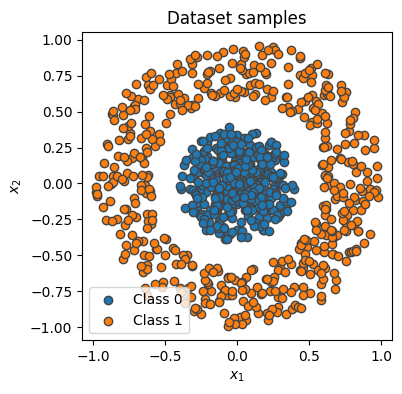

In [24]:
visualize_samples(dataset.data, dataset.label)
plt.show()

#### Učitavanje podataka

Za učitavanje podataka, koristit ćemo klasu `DataLoader` koja je prethodno spomenuta. Možemo podesiti učitavanje podataka pomoću sljedećih argumenata:
 - `batch_size`: Broj podataka u seriji
 - `shuffle`: Ako je `True`, raspored podataka je nasumičan.
 - `num_workers`: Broj subprocesa koji će se koristiti za učitavanje podataka. Može biti dobro povećati broj subprocesa za učitavanje u slučaju da učitavanje podataka dugo traje, primjerice u slučaju slika.

Za više informacija o radu s podatkovnim skupovima, pogledajte službenu [dokumentaciju](https://pytorch.org/docs/stable/data.html).
Napravit ćemo jednostavan *DataLoader* pomoću *Dataseta* koji smo prethodno definirali.

In [25]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [26]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.4015, -0.7275],
        [-0.1559, -0.0976],
        [-0.1659,  0.1157],
        [-0.0438, -0.6476],
        [ 0.0226,  0.1304],
        [ 0.5821, -0.7832],
        [-0.2530, -0.2345],
        [ 0.0977, -0.6033]])
Data labels torch.Size([8]) 
 tensor([1., 0., 0., 1., 0., 1., 0., 1.])


#### Mreža

Paket `torch.nn` sadrži brojne korisne klase poput slojeva, aktivacijskih funkcija, funkcija gubitka itd. Više o tome možete pronaći [ovdje](https://pytorch.org/docs/stable/nn.html). Također ćemo koristiti i funkcije iz `torch.nn.functional`.

In [48]:
import torch.nn as nn
import torch.nn.functional as F

U PyTorchu su neuronske mreže sagrađene od modula. Moduli se mogu upotrebljavati unutar mreže i svaka mreža je također modul. U `forward` funkciji se definira glavna funkcionalnost mreže i to je funkcija koja se poziva kad se pozove objekt klase modula. U ovoj funkciji definiramo ponašanje mreže, pozivamo druge module itd. Slijedi standardna struktura modula.

In [28]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

Za potrebe treniranja klasifikatora na gore definiranom podatkovnom skupu, izgradit ćemo unaprijednu, potpuno povezanu mrežu. Mreža će se sastojati od ulaznog sloja, jednog skrivenog sloja s ReLU aktivacijskom funkcijom te izlaznog sloja.

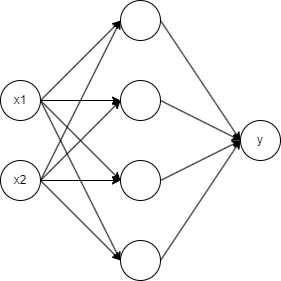

In [29]:
class Classifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

Ova klasa mora imati dvije funkcije: konstruktor i `forward()`. U konstruktoru definiramo sve slojeve i aktivacijske funkcije koje će se koristiti. U funkciji `forward()` definiramo strukturu mreže, odnosno što se događa s ulaznim podacima u svakom prolasku kroz mrežu.

Lako možemo izgraditi model prethodno definirane mreže te ispisati neke od značajki mreže. Samim ispisvanjem objekta, dobit ćemo listu submodula. Možemo koristiti `parameters()` i `named_parameters()` za ispis pojedinih parametara mreže.

In [30]:
model = Classifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

print('Parameters:')
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Classifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): ReLU()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)
Parameters:
Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


#### Treniranje mreže

Treniranje se odvija u nekoliko koraka:
 1. Uzmi *batch* iz *DataLoadera*,
 2. Izračunaj izlaze iz modela za taj *batch*,
 3. Izračunaj gubitak na temelju dobivenih i stvarnih vrijednosti,
 4. *Backpropagacija*: izračunaj gradijent za svaki parametar na temelju gubitka,
 5. Ažuriraj parametre modela u smjeru gradijenta.


 Pošto smo prethodno obradili korake 1, 2, i 4, još trebamo proći kroz korake 3 i 5.

Mnoge funkcije gubitka su već implementirane u PyTorchu te se iste mogu pogledati [ovdje](https://pytorch.org/docs/stable/nn.html#loss-functions). Za ovaj primjer binarne klasifikacije, koristit ćemo binarnu unakrsnu entropiju (engl. *Binary cross entropy (BCE)*). Standardni BCE očekuje vrijednosti između 0 i 1, a naši izlazi ne moraju biti u tom rasponu jer nismo stavili aktivacijsku funkciju na kraj mreže. Iz ovog razloga ćemo koristiti `nn.BCEWithLogitsLoss` koja kombinira sigmoid aktivacijsku funkciju i BCE funkciju gubitka.

In [31]:
loss_module = nn.BCEWithLogitsLoss()

Za ažuriranje parametara, koristit ćemo optimizatore iz paketa `torch.optim`. Za ovaj primjer ćemo koristiti najjednostavniji optimizator, metodu gradijentnog spusta (engl. *Stochastic Gradient Descent (SGD)*), ali postoje mnogi optimizatori o kojima možete pročitati [ovdje](https://pytorch.org/docs/stable/optim.html). Metoda gradijentnog spusta koristi jedan parametar, stopu učenja (engl. *learning rate*) te se svaki parametar mreže ažurira na sljedeći način:

$$w_i \leftarrow w_i - \alpha*\frac{\partial J}{\partial w_i},$$

gdje je $w_i$ jedan parametar mreže, $\alpha$ stopa učenja, a $J$ funckija gubitka. Na taj način se polako minimizira funkcija gubitka.

Optimizator ima dvije bitne funckije `step()` i `zero_grad()`. *step* funkcija ažurira parametre na temelju gradijenata dok funkcija *zero_grad* postavlja sve gradijente na 0. Ovo je bitno učiniti pri svakom koraku treniranja mreže jer bi se u suprotnom gradijenti zbrajali s gradijentima iz prethodnog koraka.

In [32]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#### Treniranje

Sad imamo sve potrebne elemente koje možemo pospajati kako bismo trenirali mrežu. Prije svega nam treba podatkovni skup. Pri kreaciji *dataloadera*, potrebno je definirati veličinu serije (`batch_size`) i sve druge parametre.

In [33]:
train_dataset = ExampleDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [34]:
# Push model to device. Has to be only done once
model.to(device)

Classifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): ReLU()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

Napisat ćemo jednostavnu funkciju za treniranje koja će implementirati svih 5 gore navedenih koraka. Bitno je pozvati funkciju `train()` na modelu prilikom treniranja. Isto tako, potrebno je pozvati funkciju `eval()` na modelu prilikom evaluacije istog. Ovo se radi jer neki moduli drugačije rade prilikom treniranja i evaluacije (npr. BatchNorm i Dropout).

In [79]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [80]:
def train_model(model, optimizer, data_loader, val_data_loader, loss_module, num_epochs=100, eval_epochs=10):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

    model.eval()

    if epoch % eval_epochs == 0:
      eval_model(model, val_data_loader)


    model.train()
        ## TODO
        ## Add evaluation on validation dataset every eval_epochs (add this as the argument of the function) epochs and print it out

In [81]:
train_model(model, optimizer, train_data_loader, loss_module, 200, 20)

  0%|          | 0/20 [00:00<?, ?it/s]


TypeError: ignored

#### Spremanje modela

Parametrima modela se može pristupiti pomoću funkcije `state_dict()` te se ti parametri mogu spremiti pomoću funkcije `torch.save()`.

In [37]:
state_dict = model.state_dict()
print(state_dict)
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.pt")

OrderedDict([('linear1.weight', tensor([[-3.2142,  4.4183],
        [ 4.6110,  2.9401],
        [ 0.6997,  3.9055],
        [-0.1396,  0.0293]], device='cuda:0')), ('linear1.bias', tensor([-0.1570, -0.1779,  2.4535, -0.1416], device='cuda:0')), ('linear2.weight', tensor([[ 5.4468,  5.4321, -4.6592, -0.2417]], device='cuda:0')), ('linear2.bias', tensor([3.1147], device='cuda:0'))])


Isto tako možemo učitati te parametre pomoću funkcije `torch.load()` te ih prepisati preko trenutnih parametara modela pomoću funkcije `load_state_dict()`. Više o spremanju i učitavanju modela možete pročitati [ovdje](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

In [38]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.pt")

# Create a new model and load the state
new_model = Classifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-3.2142,  4.4183],
        [ 4.6110,  2.9401],
        [ 0.6997,  3.9055],
        [-0.1396,  0.0293]], device='cuda:0')), ('linear1.bias', tensor([-0.1570, -0.1779,  2.4535, -0.1416], device='cuda:0')), ('linear2.weight', tensor([[ 5.4468,  5.4321, -4.6592, -0.2417]], device='cuda:0')), ('linear2.bias', tensor([3.1147], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-3.2142,  4.4183],
        [ 4.6110,  2.9401],
        [ 0.6997,  3.9055],
        [-0.1396,  0.0293]])), ('linear1.bias', tensor([-0.1570, -0.1779,  2.4535, -0.1416])), ('linear2.weight', tensor([[ 5.4468,  5.4321, -4.6592, -0.2417]])), ('linear2.bias', tensor([3.1147]))])


#### Evaluacija modela

Nakon što smo istrenirali mrežu, možemo ju testirati na našem testnom skupu. Zato što radimo na generiranim podacima, možemo samo generirati nove podatke za potrebe testiranja.

In [39]:
test_dataset = ExampleDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

Za testiranje ćemo koristiti mjeru točnosti:
$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

Za potrebe evaluacije, ne trebamo računati gradijente pa možemo koristiti naredbu `with torch.no_grad(): ...` kako bismo ubrzali rad i koristili manje resursa.  

In [49]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [50]:
eval_model(model, test_data_loader)

Accuracy of the model: 99.80%


#### Vizualizacija granice klasifikacije

In [42]:
from matplotlib.colors import to_rgba

@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=200)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-2, 2, step=0.01, device=device)
    x2 = torch.arange(-2, 2, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-2, 2, -2, 2))
    plt.grid(False)
    return fig

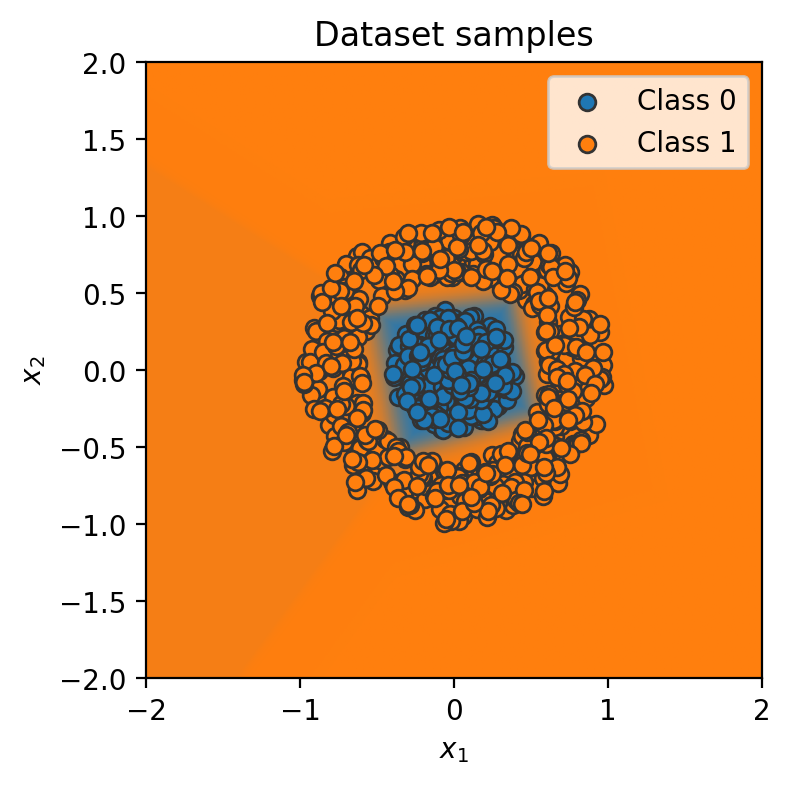

In [43]:
_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

# Zadaci

Riješite TODO-ove u gornjim ćelijama zatim riješite zadatak.

## Zadatak

Izgradite, istrenirajte i istestirajte neuronsku mrežu za predikciju podataka iz dolje definiranog podatkovnog skupa. U pitanju je XOR funkcija koja prima dvije binarne vrijednosti i vraća 1 ako su $x_1$ i $x_2$ jednaki, a 0 ako su različiti. Također su dodana nasumična odstupanja od vrijednosti.

Isprobajte različite aktivacijske funkcije, broj skrivenih slojeva, broj neurona u skrivenim slojevima itd.

In [76]:
class TaskDataset(data.Dataset):

  def __init__(self, size, std=0.1):
    """
    Inputs:
        size - Number of data points we want to generate
    """
    super().__init__()
    self.size = size
    self.std = std
    self.generate_dataset()

  def generate_dataset(self):
    data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
    label = (data.sum(dim=1) == 1).to(torch.long)
    data += self.std * torch.randn(data.shape)

    self.data = data
    self.label = label

  def __len__(self):
    return self.size

  def __getitem__(self, idx):
    data_point = self.data[idx]
    data_label = self.label[idx]
    return data_point, data_label

In [77]:
def visualize_data(data, label):
  if isinstance(data, torch.Tensor):
    data = data.cpu().numpy()
  if isinstance(label, torch.Tensor):
    label = label.cpu().numpy()

  data_0 = data[label == 0]
  data_1 = data[label == 1]

  plt.figure(figsize=(4,4))
  plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
  plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
  plt.title("Dataset samples")
  plt.ylabel(r"$x_2$")
  plt.xlabel(r"$x_1$")
  plt.legend()

In [75]:
## TODO
## Create the training and validation datasets and their dataloader

class ExampleDataset(data.Dataset):

  def __init__(self, size):
    """
    Inputs:
        size - Number of data points we want to generate
    """
    super().__init__()
    self.size = size
    self.generate_dataset()

  def generate_data(self, r1, r2, n):
    radii = r1 + torch.rand(n) * (r2-r1)
    angles = torch.rand(n) * 2 * math.pi
    x1 = radii * torch.cos(angles)
    x2 = radii * torch.sin(angles)
    return torch.stack([x1, x2], 1)

  def generate_dataset(self):
    class0_size = self.size // 2
    class1_size = self.size - class0_size
    data0 = self.generate_data(0, 0.4, class0_size)
    data1 = self.generate_data(0.6, 1.0, class1_size)
    label = torch.hstack([torch.zeros(class0_size), torch.ones(class1_size)])
    data = torch.vstack([data0, data1])
    indices = torch.randperm(data.shape[0])
    data = data[indices]
    label = label[indices]
    self.data = data
    self.label = label

  def __len__(self):
    # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
    return self.size

  def __getitem__(self, idx):
    # Return the idx-th data point of the dataset
    # If we have multiple things to return (data point and label), we can return them as tuple
    data_point = self.data[idx]
    data_label = self.label[idx]
    return data_point, data_label

In [68]:
dataset = ExampleDataset(50)

In [70]:
data_loader = data.DataLoader(dataset, batch_size=2, shuffle=True)

In [71]:
## TODO
## Visualize the training data

def visualize_samples(data, label):
  if isinstance(data, torch.Tensor):
    data = data.cpu().numpy()
  if isinstance(label, torch.Tensor):
    label = label.cpu().numpy()
  data_0 = data[label == 0]
  data_1 = data[label == 1]

  plt.figure(figsize=(4,4))
  plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#444", label="Class 0")
  plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#444", label="Class 1")
  plt.title("Dataset samples")
  plt.ylabel(r"$x_2$")
  plt.xlabel(r"$x_1$")
  plt.legend()

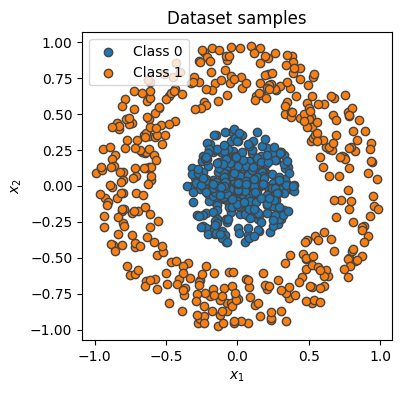

In [72]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [ ]:
## TODO
## Define your network
class TaskNetwork(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        return x

In [ ]:
## TODO
## Create the model and push it to the device

In [ ]:
## TODO
## Define the loss function and the optimizer
## Note: Find a proper loss function for the regression problem

In [ ]:
## TODO
## Create your functions for training and evaluation

In [ ]:
## TODO
## Train the model (use the validation dataset while training)

In [ ]:
## TODO
## Test your model